# <h1><center><span style="color: red;">$\textbf{Superposition}$</center></h1>

<font size = '4'> It’s only when you look at the tiniest quantum particles like atoms, electrons, photons, and the like — that you see intriguing phenomena like $\textbf{superposition and entanglement}$.
    
$\textbf{Superposition}$ refers to the quantum phenomenon where a quantum system can exist in multiple states or places at the exact same time. In other words, something can be “here” and “there,” or “up” and “down” at the same time.

In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state_qsphere
from math import pi
from qiskit.quantum_info import Statevector
from IPython.core.display import Image, display
import numpy as np

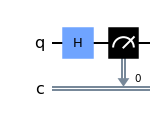

In [2]:
qch = QuantumCircuit(1,1)
qch.h(0)
qch.measure(0,0)
qch.draw('mpl')

{'1': 512, '0': 512}


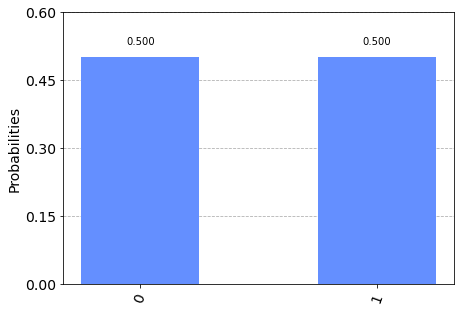

In [3]:
backend = Aer.get_backend('qasm_simulator')
job_sim = execute(qch, backend, shots=1024)
sim_result = job_sim.result()

measurement_result = sim_result.get_counts(qch)
print(measurement_result)
plot_histogram(measurement_result)

# <h1><center><span style="color: red;">$\textbf{Random Circuit}$</center></h1>

<font size = '4'>Generate random circuit of arbitrary size and form

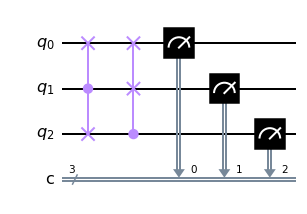

In [4]:
from qiskit.circuit.random import random_circuit

circ = random_circuit(3, 2, measure=True)
circ.draw(output='mpl')


# <h1><center><span style="color: red;">$\textbf{Quantum Entanglement}$</center></h1>

<font size = '4'> $\textbf{Quantum entanglement}$ is a quantum mechanical phenomenon in which the quantum states of two or more objects have to be described with reference to each other, even though the individual objects may be spatially separated.
    
For example, it is possible to prepare two particles in a single quantum state such that when one is observed to be spin-up, the other one will always be observed to be spin-down and vice versa, this despite the fact that it is impossible to predict, according to quantum mechanics, which set of measurements will be observed.

### Quantum entanglement has applications in the emerging technologies of quantum computing and quantum cryptography, and has been used to realize quantum teleportation experimentally.

# <h1><center><span style="color: blue;">$\textbf{Bell State or Entanglement circuit}$

<font size = '4'>The Bell states are four specific maximally entangled quantum states of two qubits. They are in a superposition of 0 and 1--that is, a linear combination of the two states. Their entanglement means the following:

The qubit held by Alice (subscript "A") can be 0 as well as 1. If Alice measured her qubit in the standard basis, the outcome would be perfectly random, either possibility 0 or 1 having probability 1/2. But if Bob (subscript "B") then measured his qubit, the outcome would be the same as the one Alice got. So, if Bob measured, he would also get a random outcome on first sight, but if Alice and Bob communicated, they would find out that, although their outcomes seemed random, they are perfectly correlated.
    \begin{equation}\begin{aligned}
\textbf{For initial state {00},}\left|\Psi^{+}\right\rangle &=\frac{1}{\sqrt{2}}\left(|0\rangle_{A} \otimes|0\rangle_{B}+|1\rangle_{A} \otimes|1\rangle_{B}\right)(1) \\
\textbf{For initial state {10},}\left|\Psi^{-}\right\rangle &=\frac{1}{\sqrt{2}}\left(|0\rangle_{A} \otimes|0\rangle_{B}-|1\rangle_{A} \otimes|1\rangle_{B}\right)(2) \\
\textbf{For initial state {01},}\left|\Phi^{+}\right\rangle &=\frac{1}{\sqrt{2}}\left(|0\rangle_{A} \otimes|1\rangle_{B}+|1\rangle_{A} \otimes|0\rangle_{B}\right)(3) \\
\textbf{For initial state {11},}\left|\Phi^{-}\right\rangle &=\frac{1}{\sqrt{2}}\left(|0\rangle_{A} \otimes|1\rangle_{B}-|1\rangle_{A} \otimes|0\rangle_{B}\right)(4)
\end{aligned}\end{equation}

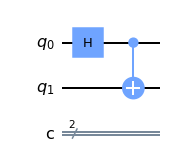

In [5]:
entanglement1 = QuantumCircuit(2,2)
entanglement1.h(0)
entanglement1.cx(0,1)
entanglement1.draw('mpl')

<img src="Images/bell state.png" width="70%">
<img src="Images/tensor product.png" width="70%">

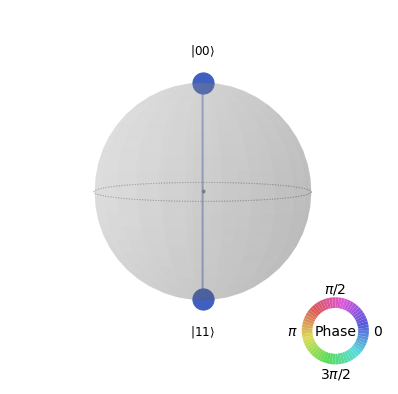

In [6]:
sv = Statevector.from_label('00')
# plot_state_qsphere(sv.data)
new_sv = sv.evolve(entanglement1)
#print(new_sv)
plot_state_qsphere(new_sv.data)

In [7]:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(entanglement1,backend).result().get_statevector()
from qiskit_textbook.tools import array_to_latex
array_to_latex(final_state, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>

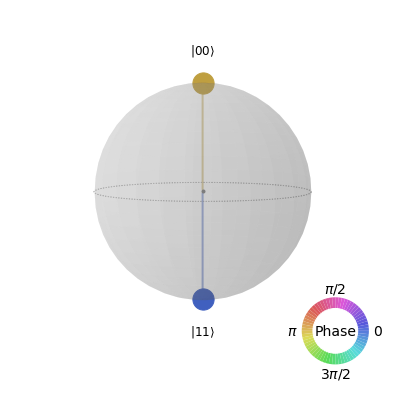

In [8]:
entanglement2 = entanglement1.copy()
sv = Statevector.from_label("01")# Here 0 is the second qubit and 1 is the first qubit
new_sv = sv.evolve(entanglement2)
plot_state_qsphere(new_sv.data)

In [9]:
# Let's see the result
final_state = execute(entanglement1,backend).result().get_statevector()
from qiskit_textbook.tools import array_to_latex
array_to_latex(final_state, pretext="\\text{Statevector} = ")

<IPython.core.display.Math object>